In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rc = {"font.family": "serif",  # fonte serifada
      "mathtext.fontset": "cm",  # texto matemático em LaTeX
      "font.size": 14,  # Usar tamanho 12 ou 14
      "axes.axisbelow": True,  # grid abaixo dos dados
      "text.usetex": True,
      "axes.grid": True
      }

%matplotlib inline

plt.rcParams.update(rc)


In [11]:
def regressao_polinomial(x, y, deg=1, return_all=False):
    """
    - Retorna: 
      coeficientes, polinomio, regressão | regressao
    """
    coeficientes = np.polyfit(x, y, deg=deg)
    polinomio = np.poly1d(coeficientes)
    regressao = polinomio(x)
    return [coeficientes, polinomio, regressao] if return_all else regressao


def add_c_grid(a1=0.5, a2=0.5):
    ax.minorticks_on()
    ax.grid(which='major', alpha=a1)
    ax.grid(which='minor', alpha=a2)


def add_sci_limits(ax='both', limits=(0, 0)):
    plt.ticklabel_format(
        axis=ax,
        style='sci',
        useMathText=True,
        scilimits=limits)

def save_tab(tab, file, idx=True, header=True):
    tab.to_latex(
    buf=file,
    bold_rows=True,
    escape=False,
    index=idx,
    encoding='utf-8',
    header=header,
    column_format=len(tab.columns)*'c')

In [19]:
def reg_lin_manual(x, y, retorna_incerteza=False) -> list:
    '''
    Calcula os coeficientes da regressão linear calculada manualmente de x e y.

    # Retorna

    ## retorna_incerteza = False
     * [A, B, reg]

    ## retorna_incerteza = True
    * [A, B, reg, sigma_a, sigma_b]

    # Descrição do retorno:
    * A : Coeficiente linear
    * B: Coeficiente angular
    * reg: vetor de regeressão
    * sigma_a: incerteza de A
    * sigma_b: incerteza de B
    '''

    B = ((np.sum(x) * np.sum(y)) - (x.size * np.sum(x*y))) / \
        (np.sum(x)**2 - (x.size * np.sum(x**2)))

    A = (np.sum(y) - B * np.sum(x)) / (x.size)

    pol = np.poly1d([B, A])
    reg = pol(x)

    if retorna_incerteza:
        S = np.sum(np.power(y - reg, 2))
        den = (x.size * np.sum(x**2)) - (np.sum(x))**2

        sigma_a = S / ((x.size - 2) * np.sqrt(den))
        sigma_b = (S / (x.size - 2)) * np.sqrt(np.sum(x**2)/den)
        return [A, B, reg, sigma_a, sigma_b]

    return [A, B, reg]


# Coleta dos dados

In [20]:
tab_1 = pd.DataFrame({})

tab_1['theta'] = [70.0,  83.0,  83.0, 84.0, 84.0 , 85.0,  85.0, 86.0,  87.0]
tab_1['tg_theta'] = np.tan(np.radians(tab_1['theta']))
tab_1['corrente'] = np.arange(20e-3, 200e-3, 20e-3)

tab_1


,theta,tg_theta,corrente
0,70.0,2.747477,0.02
1,83.0,8.144346,0.04
2,83.0,8.144346,0.06
3,84.0,9.514364,0.08
4,84.0,9.514364,0.10
5,85.0,11.430052,0.12
6,85.0,11.430052,0.14
7,86.0,14.300666,0.16
8,87.0,19.081137,0.18


In [21]:
tab_1_latex = tab_1.copy()

tab_1_latex.drop('tg_theta', axis=1, inplace=True)

tab_1_latex.rename({
  'theta': r'$\theta  \pm 0.5 \, [^\circ]$',
  'corrente': r'$I \pm 0.01 \, [A]$'
}, axis=1, inplace=True)

In [22]:
tab_1_latex_preenchida = tab_1_latex.copy()
tab_1_latex_preenchida[r'$tg(\theta)\, [^\circ]$'] = tab_1['tg_theta']

tab_1_latex_preenchida

,"$\theta \pm 0.5 \, [^\circ]$","$I \pm 0.01 \, [A]$","$tg(\theta)\, [^\circ]$"
0,70.0,0.02,2.747477
1,83.0,0.04,8.144346
2,83.0,0.06,8.144346
3,84.0,0.08,9.514364
4,84.0,0.10,9.514364
5,85.0,0.12,11.430052
6,85.0,0.14,11.430052
7,86.0,0.16,14.300666
8,87.0,0.18,19.081137


In [23]:
save_tab(tab_1_latex, './tab_1_vazia.tex')
save_tab(tab_1_latex_preenchida, './tab_1_preenchida.tex')

/tmp/ipykernel_24087/1880754672.py:26: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab.to_latex(


In [24]:
coef, pol, reg = regressao_polinomial(
    x=tab_1['tg_theta'], y=tab_1['corrente'], return_all=True)


print(pol)

 
0.01133 x - 0.0187


In [25]:
A, B, reg, sigma_a, sigma_b =  reg_lin_manual(x=tab_1['tg_theta'], y=tab_1['corrente'], retorna_incerteza=True)

In [26]:
sigma = np.sqrt(sigma_a**2 + sigma_b**2)
sigma*1e4

3.91452688924356

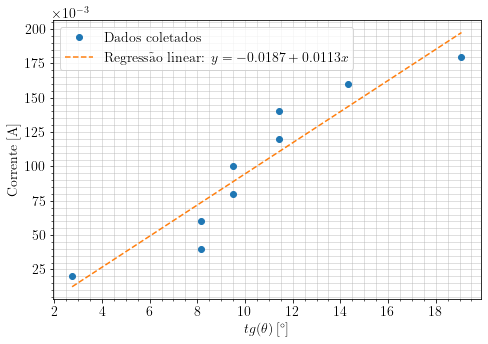

In [28]:
f, ax = plt.subplots(figsize=(7, 5))

ax.plot(tab_1['tg_theta'], tab_1['corrente'], 'o', label='Dados coletados')
ax.plot(tab_1['tg_theta'], reg, '--',
        label=f'Regressão linear: $y = {coef[1]:.4f} + {coef[0]:.4f}x$ ')

ax.legend()

add_c_grid()
add_sci_limits(ax='y', limits=(-3, -3))

ax.set(
    xlabel=r'$tg (\theta)\, [^\circ]$',
    ylabel=r'Corrente [A]'
)

f.tight_layout()
f.savefig('corrente-tg.pdf')
plt.show()


In [ ]:
mu_0 = 1.26e-6
N = 200
r = 0.1

c = (8/(5 * np.sqrt(5))) * ((mu_0 * N) / r)

print(coef[0]*c)

2.0425381390541072e-05
